# Chapter 2: Hierarchical Clustering

## Activity 2.01

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_df = pd.read_csv("wine_data.csv")
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


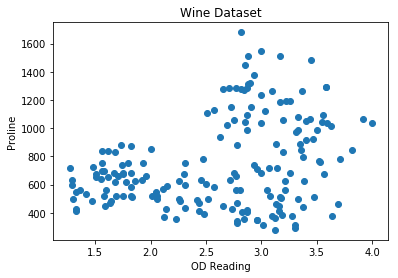

In [3]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [4]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

In [5]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

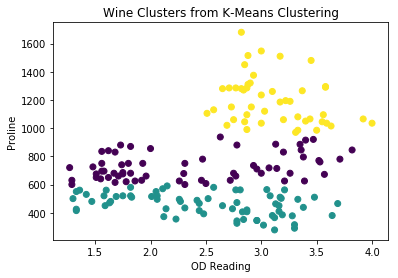

In [6]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from K-Means Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

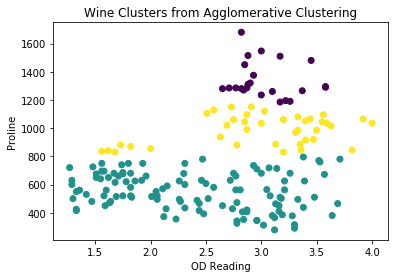

In [7]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [8]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agg Clustering:  0.5988495817462


In [9]:
# Unit test

In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import unittest
class TestHierarchicalClustering(unittest.TestCase):
    wine_df2 = pd.read_csv("wine_data.csv")
    
    def test_wine_df(self):
        self.assertEqual(len(self.wine_df2.head()),5)
        
    def test_km(self):
        km2 = KMeans(3)
        self.assertMultiLineEqual(str(km2),str(km))
        
    def test_km_clusters(self):
        km2 = KMeans(3)
        km2_clusters = km2.fit_predict(self.wine_df2)
        self.assertEqual(len(km2_clusters),len(km_clusters))
        
    def test_ac(self):
        ac2 = AgglomerativeClustering(3, linkage='average')
        self.assertMultiLineEqual(str(ac2),str(ac))
        
    def test_ac_clusters(self):
        ac2 = AgglomerativeClustering(3, linkage='average')
        ac2_clusters = ac2.fit_predict(self.wine_df2)
        self.assertEqual(len(ac2_clusters),len(ac_clusters))
        
    def test_silhouette_k(self):
        self.assertAlmostEqual(silhouette_score(wine_df, km_clusters),0.5809421087616886)
        
    def test_silhouette_agg(self):
        self.assertAlmostEqual(silhouette_score(wine_df, ac_clusters),0.5988495817462)

In [11]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestHierarchicalClustering)
unittest.TextTestRunner(verbosity=2).run(suite)

test_ac (__main__.TestHierarchicalClustering) ... ok
test_ac_clusters (__main__.TestHierarchicalClustering) ... ok
test_km (__main__.TestHierarchicalClustering) ... ok
test_km_clusters (__main__.TestHierarchicalClustering) ... ok
test_silhouette_agg (__main__.TestHierarchicalClustering) ... ok
test_silhouette_k (__main__.TestHierarchicalClustering) ... ok
test_wine_df (__main__.TestHierarchicalClustering) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.105s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>